# Problem 1: Momentum Crashes
### Team: Yecheng Cao, Zheyu Gu

## Question 1
The "Momentum Crashes" paper addresses a major problem that static momentum strategies are always facing, which is the negatively skewed return distribution. This kind of distribution, although has more frequent positive returns, it is subject to a few large negative numbers leading to some big crashes, for example before World War II and during financial crisis in 2008. The primary reason contributing to this problem is the change of the market pattern, for example market rebouncing from a drawdown. The momentum strategy taking long position in well-performed stocks (low beta) and losing stocks (high beta) in the bear market will suffer great losses when the market rebounces back. Therefore, several solutions have been posted to solve the momentum crash problem, especially in these special volatile times, and the most straightforward idea is to hedge the momentum portfolio with market portfolio. Different regression models including different components (indicator for bearish/bullish of pervious market, indicator for bearish/bullish of current market, and current market portfolio return) are tested in both ex-post and ex-ante manners. Ex-post manner uses future data as regression data for determining hedging ratio, but this manner creates significant look-ahead bias. On the other hand, ex-ante manner uses past data as regression data for determining hedging ratio, but the nature of time-variant beta makes this kind of hedging less effective. Hence, none of these two ways can be both practical and effective, and hedging with market portfolio will also negatively affect the strategy performance in long-term outside the panic periods. As a response to these shortcomings of hedging, the method of dynamic weighting of the momentum portfolio has been proposed by the authors of the paper. The intuition of this method is to adjust the weighting of the strategy based on forecasted risk-adjusted return so that the strategy can perform better in the future. The authors proposed to forecast the strategy's return from two factors, which are current market situation (whether it is a bull or bear market) and previous return volatility. The volatility forecasting is driven by GJR-GARCH to account for any asymmetry effect. The strategy proposes us to invest more when the strategy's risk-adjusted return is high, and it warns us to deinvest when the forecasted risk-adjusted return is low. The underlying philosophy of this strategy is still based on momentum investing, but with addition to control of risk. In backtesting, this dynamic weighting momentum strategy can significantly outperform the static momentum strategy in all subperiods from 1927 to 2013, and its Sharpe ratio doubles that of the static momentum strategy.

## Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as date

In [2]:
djtmnmo = pd.read_excel('MomentumDJTMNMO.xlsx')
mom = pd.read_excel('MOM.xlsx')
djtmnmo = djtmnmo.iloc[6:2863,]
mom.Date = pd.to_datetime(mom.Date)

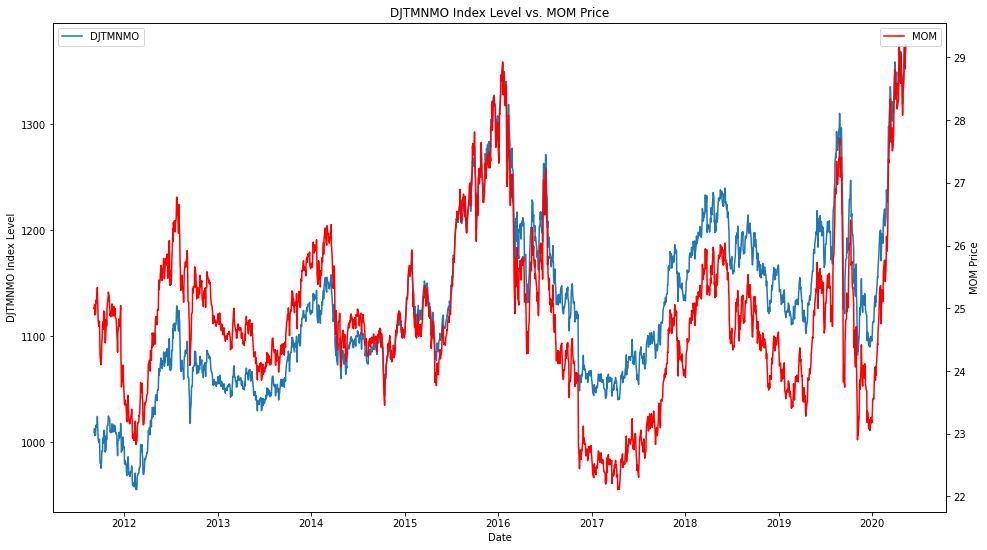

In [3]:
fig, ax1 = plt.subplots(figsize=(16,9))

ax2 = ax1.twinx()
ax1.plot(djtmnmo[djtmnmo.iloc[:,0]>=mom.Date[0]].iloc[:,0],djtmnmo[djtmnmo.iloc[:,0]>=mom.Date[0]].iloc[:,1], label='DJTMNMO')
ax2.plot(mom[mom.loc[:,'Date']<=djtmnmo.iloc[:,0].values[-1]].Date,mom[mom.loc[:,'Date']<=djtmnmo.iloc[:,0].values[-1]]['MOM NAV'], color='red', label='MOM')

ax1.set_xlabel('Date')
ax1.set_ylabel('DJTMNMO Index Level')
ax2.set_ylabel('MOM Price')

ax1.legend(loc=2)
ax2.legend(loc=1)

plt.title('DJTMNMO Index Level vs. MOM Price')

plt.show()

**Comparison between DJTMNMO and MOM:** It is clear that MOM seeks to track the performance DJTMNMO's strategy, given the generally similar path patterns of the index and ETF. However, there exists some tracking errors in the overlapping interval, especially when the there is a huge gain or loss in the index. Specifically, the ETF gains more when the index is up and loses more when the index is down. Several portfolio construction processes can lead to the tracking errors, for example the criterion of determining high-momentum and low-momentum stocks, weighting methodology, rebalancing frequency and period, etc. Overall, the fund manager should take a closer look at where the tracking errors come from and make necessary adjustment to better track the index. 

## Question 3

In [4]:
djtmnmo = djtmnmo.set_index('Unnamed: 0')
djtmnmo.index = djtmnmo.index.rename('Date')
djtmnmo = djtmnmo.iloc[:,0:1]
djtmnmo = djtmnmo.rename(columns={'Unnamed: 1':'DJTMNMO'})

In [5]:
MTUM = pd.read_csv('MTUM.csv')
SPY = pd.read_csv('SPY.csv')
VIX = pd.read_csv('VIX.csv')

In [6]:
MTUM.Date = pd.to_datetime(MTUM.Date)
MTUM = MTUM.set_index('Date')
MTUM = MTUM.iloc[:,4:5]
MTUM = MTUM.rename(columns={'Adj Close':'MTUM'})

SPY.Date = pd.to_datetime(SPY.Date)
SPY = SPY.set_index('Date')
SPY = SPY.iloc[:,4:5]
SPY = SPY.rename(columns={'Adj Close':'SPY'})

VIX.Date = pd.to_datetime(VIX.Date)
VIX = VIX.set_index('Date')
VIX = VIX.iloc[:,4:5]
VIX = VIX.rename(columns={'Adj Close':'VIX'})

In [7]:
df = pd.concat([djtmnmo, MTUM, SPY, VIX], axis=1, sort=False)
df = df.dropna()

In [8]:
df

,DJTMNMO,MTUM,SPY,VIX
Date,,,,
2013-04-18,1053.16,46.202019,132.980682,17.559999
2013-04-19,1063.54,46.202019,134.136749,14.970000
2013-04-22,1065.9,46.202019,134.732071,14.390000
2013-04-23,1070,47.381573,136.120987,13.480000
2013-04-24,1064.72,46.782730,136.207321,13.610000
...,...,...,...,...
2020-05-05,1363.2,118.685532,283.800079,33.610001
2020-05-06,1372.54,118.655724,281.876282,34.119999
2020-05-07,1373.43,119.510231,285.277618,31.440001


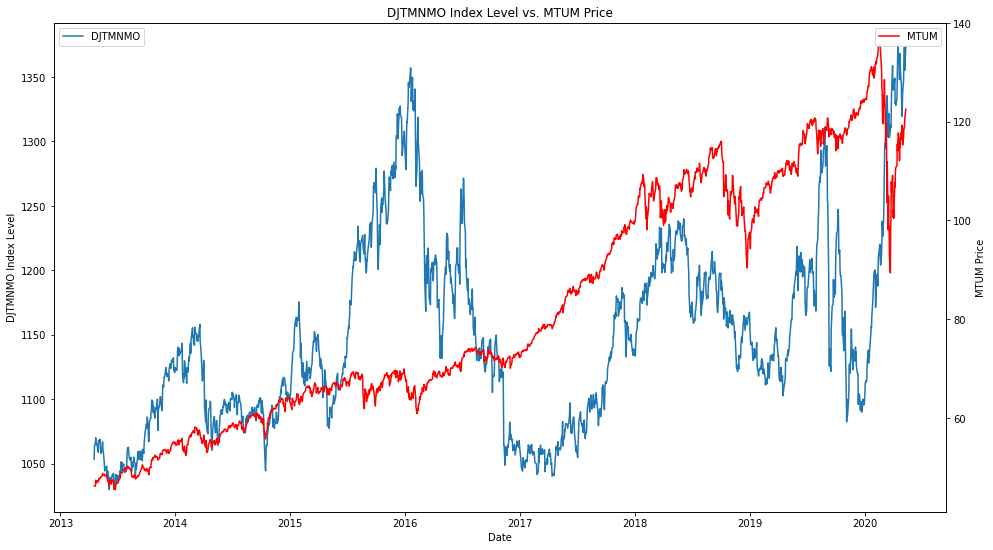

In [9]:
fig, ax1 = plt.subplots(figsize=(16,9))

ax2 = ax1.twinx()
ax1.plot(df.index,df.DJTMNMO, label='DJTMNMO')
ax2.plot(df.index,df.MTUM, color='red', label='MTUM')

ax1.set_xlabel('Date')
ax1.set_ylabel('DJTMNMO Index Level')
ax2.set_ylabel('MTUM Price')

ax1.legend(loc=2)
ax2.legend(loc=1)

plt.title('DJTMNMO Index Level vs. MTUM Price')

plt.show()

In [10]:
df['DJTMNMO Daily Return'] = df['DJTMNMO']/df['DJTMNMO'].shift(1)-1
df['MTUM Daily Return'] = df['MTUM']/df['MTUM'].shift(1)-1
df['SPY Daily Return'] = df['SPY']/df['SPY'].shift(1)-1
df['VIX Daily Return'] = df['VIX']/df['VIX'].shift(1)-1
df = df.dropna()

In [11]:
df

,DJTMNMO,MTUM,SPY,VIX,DJTMNMO Daily Return,MTUM Daily Return,SPY Daily Return,VIX Daily Return
Date,,,,,,,,
2013-04-19,1063.54,46.202019,134.136749,14.970000,0.00985605,0.000000,0.008693,-0.147494
2013-04-22,1065.9,46.202019,134.732071,14.390000,0.002219,0.000000,0.004438,-0.038744
2013-04-23,1070,47.381573,136.120987,13.480000,0.00384651,0.025530,0.010309,-0.063238
2013-04-24,1064.72,46.782730,136.207321,13.610000,-0.00493458,-0.012639,0.000634,0.009644
2013-04-25,1065.62,47.009575,136.759445,13.620000,0.000845293,0.004849,0.004054,0.000735
...,...,...,...,...,...,...,...,...
2020-05-05,1363.2,118.685532,283.800079,33.610001,0.0115987,0.015818,0.009239,-0.065610
2020-05-06,1372.54,118.655724,281.876282,34.119999,0.00685153,-0.000251,-0.006779,0.015174
2020-05-07,1373.43,119.510231,285.277618,31.440001,0.000648433,0.007202,0.012067,-0.078546


### Adjust the weighting of SPY to match DJTMNMO's beta

In [12]:
from sklearn.linear_model import LinearRegression

target_beta = np.zeros(len(df))
real_beta = np.zeros(len(df))
weight = np.zeros(len(df))

for i in range(50,len(df)):
    djtmnmo_train = df['DJTMNMO Daily Return'][i-50:i]
    mtum_train = df['MTUM Daily Return'][i-50:i]
    spy_train = df['SPY Daily Return'][i-50:i]
    target_reg = LinearRegression().fit(spy_train.values.reshape(-1,1), djtmnmo_train.values.reshape(-1,1))
    reg = LinearRegression().fit(spy_train.values.reshape(-1,1), mtum_train.values.reshape(-1,1))
    target_beta[i] = target_reg.coef_[0]
    real_beta[i] = reg.coef_[0]
    weight[i] = target_beta[i]-real_beta[i]

In [13]:
df['Replicated Portfolio Return'] = df['MTUM Daily Return'] + weight*df['SPY Daily Return']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


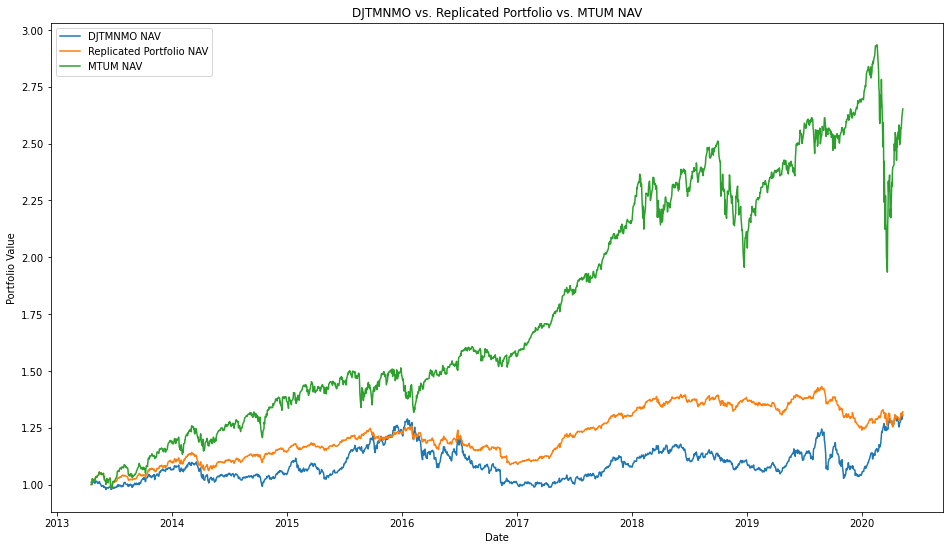

In [14]:
plt.figure(figsize=(16,9))
plt.plot((1+df['DJTMNMO Daily Return']).cumprod(),label='DJTMNMO NAV')
plt.plot((1+df['Replicated Portfolio Return']).cumprod(), label='Replicated Portfolio NAV')
plt.plot((1+df['MTUM Daily Return']).cumprod(),label='MTUM NAV')
plt.legend()
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.title('DJTMNMO vs. Replicated Portfolio vs. MTUM NAV')
plt.show()

### Adjust the weights of both MTUM and SPY to match DJTMNMO's return

In [15]:
weight_mtum_train = np.zeros(len(df))
weight_spy_train = np.zeros(len(df))

djtmnmo_train = df['DJTMNMO']
mtum_train = df['MTUM']
spy_train = df['SPY']

for i in range(0,len(df)):
    weight_mtum_train[i] = (djtmnmo_train[i]-spy_train[i])/(mtum_train[i]-spy_train[i])
    weight_spy_train[i] = 1-weight_mtum_train[i]

weight_mtum_test = np.zeros(len(df))
weight_spy_test = np.zeros(len(df))

for i in range(50,len(df)):
    #weight_spy_test[i] = (1/10)*weight_spy_train[i-10]+(1/9)*weight_spy_train[i-9]+(1/8)*weight_spy_train[i-8]+(1/7)*weight_spy_train[i-7]+(1/6)*weight_spy_train[i-6]+(1/5)*weight_spy_train[i-5]+(1/4)*weight_spy_train[i-4]+(1/3)*weight_spy_train[i-3]+(1/2)*weight_spy_train[i-2]+weight_spy_train[i-1]
    weight_mtum_test[i] = np.mean(weight_mtum_train[i-50:i])
    weight_spy_test[i] = 1-weight_mtum_test[i]


In [16]:
df['Replicated Portfolio Return'] = weight_mtum_test*df['MTUM Daily Return'] + weight_spy_test*df['SPY Daily Return']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


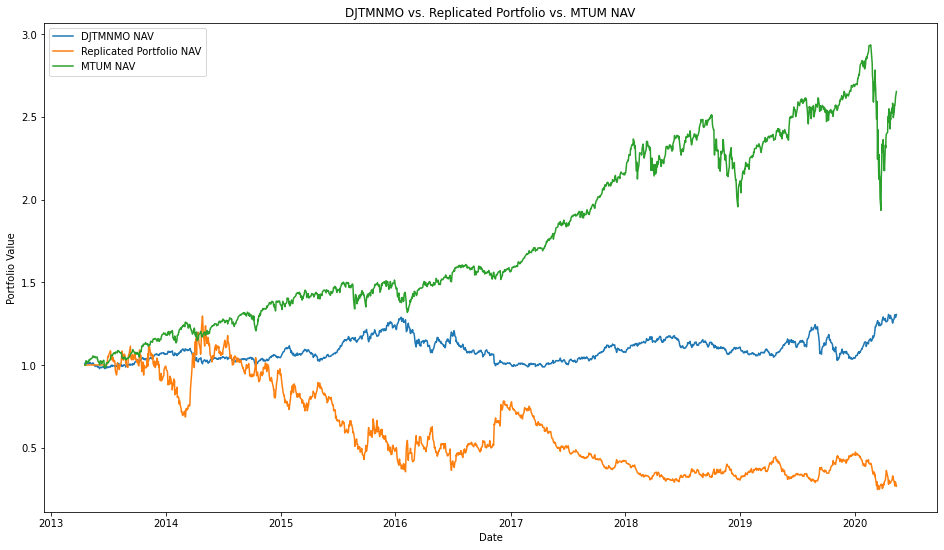

In [17]:
plt.figure(figsize=(16,9))
plt.plot((1+df['DJTMNMO Daily Return']).cumprod(),label='DJTMNMO NAV')
plt.plot((1+df['Replicated Portfolio Return']).cumprod(), label='Replicated Portfolio NAV')
plt.plot((1+df['MTUM Daily Return']).cumprod(),label='MTUM NAV')
plt.legend()
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.title('DJTMNMO vs. Replicated Portfolio vs. MTUM NAV')
plt.show()

**Replicating DJTMNMO using MTUM and SPY:** DJTMNMO is a portfolio consisting of 100% high-momentum stocks and -100% low-momentum stocks, while MTUM is just a portfolio consisting of 100% high-momentum stocks. If we could use an ETF tracking low-momentum stocks, we would potentially be able to perfectly replicate DJTMNMO due to its construction nature. However, the only security we have access to is SPY tracking S&P500 index. First, we come up a very straightforward way to roughly replicate DJTMNMO, which is to adjust the weighting of SPY so that the synthetic portfolio beta matches DJTMNMO's beta. In our replication process, we use 50-day rolling window regression to adjust daily weighting of SPY and daily portfolio risk exposure to the market, and from the plot above we can notice the replicated portfolio shows a shape very similar to that of DJTMNMO. Despite the similarity, there still exists discrepency between replicated portfolio and DJTMNMO. The primary reason of that is the beta is time-variant, which means the replication would be near to perfect if the beta remained relatively stable but would have larger difference when the beta changed a lot from in-sample to out-sample. In addition, we try to replicate DJTMNMO through adjusting the weights of both MTUM and SPY. Similarly, we use 50-day rolling moving average weights to adjust the daily weighting of MTUM and SPY. Even though the shape is pretty similar for the first half year, due to the price volatilities in a longer period without beta adjustments, moving average weighting for both MTUM and SPY crashes.

## Question 4

In [18]:
#Redo the better replicated portfolio from Question 3
from sklearn.linear_model import LinearRegression

target_beta = np.zeros(len(df))
real_beta = np.zeros(len(df))
weight = np.zeros(len(df))

for i in range(50,len(df)):
    djtmnmo_train = df['DJTMNMO Daily Return'][i-50:i]
    mtum_train = df['MTUM Daily Return'][i-50:i]
    spy_train = df['SPY Daily Return'][i-50:i]
    target_reg = LinearRegression().fit(spy_train.values.reshape(-1,1), djtmnmo_train.values.reshape(-1,1))
    reg = LinearRegression().fit(spy_train.values.reshape(-1,1), mtum_train.values.reshape(-1,1))
    target_beta[i] = target_reg.coef_[0]
    real_beta[i] = reg.coef_[0]
    weight[i] = target_beta[i]-real_beta[i]

df['Replicated Portfolio Return'] = df['MTUM Daily Return'] + weight*df['SPY Daily Return']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
I = np.zeros(len(df))
V = np.zeros(len(df))

for i in range(42,len(df)):
    I[i] = ((1+df['SPY Daily Return'][i-42:i]).cumprod().values[-1] < 1)
    V[i] = (np.std(df['MTUM Daily Return'][i-42:i])*np.sqrt(252) > df['VIX'][i]/100)
    
df['Bear Indicator'] = I
df['Volatility Indicator'] = V
df['Bear x SPY Return'] = df['Bear Indicator']*df['SPY Daily Return']
df['Volatility x SPY Return'] = df['Volatility Indicator']*df['SPY Daily Return']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [20]:
beta = np.zeros(len(df))

for i in range(168,len(df),126):
    X = df[['Bear Indicator','Volatility Indicator','SPY Daily Return','Bear x SPY Return','Volatility x SPY Return']][i-126:i]
    y = df['MTUM Daily Return'][i-126:i]
    reg = LinearRegression().fit(X, y)
    beta[i:i+126] = reg.coef_[2]+reg.coef_[3]*df['Bear Indicator'][i]+reg.coef_[4]*df['Volatility Indicator'][i]

In [21]:
df['Hedged Strategy Return'] = df['MTUM Daily Return'] - beta*df['SPY Daily Return']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


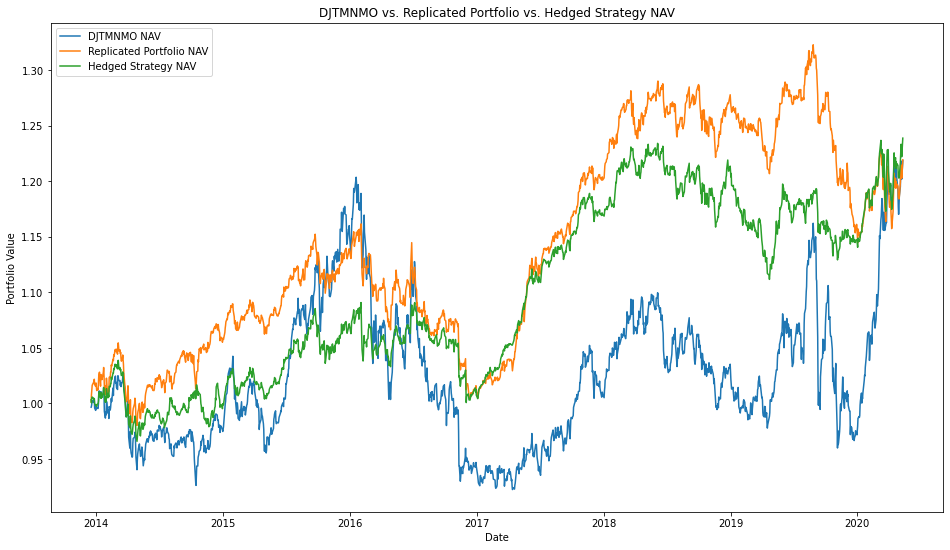

In [22]:
plt.figure(figsize=(16,9))
plt.plot((1+df['DJTMNMO Daily Return'][168:]).cumprod(),label='DJTMNMO NAV')
plt.plot((1+df['Replicated Portfolio Return'][168:]).cumprod(), label='Replicated Portfolio NAV')
plt.plot((1+df['Hedged Strategy Return'][168:]).cumprod(),label='Hedged Strategy NAV')
plt.legend()
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.title('DJTMNMO vs. Replicated Portfolio vs. Hedged Strategy NAV')
plt.show()

In [23]:
#securities = ['DJTMNMO Daily Return','MTUM Daily Return','Replicated Portfolio Return','Hedged Strategy Return']

DJTMNMO_stats = [((1+df['DJTMNMO Daily Return'][168:]).cumprod().values[-1])**
                 (252/len(df['DJTMNMO Daily Return'][168:]))-1, np.std(df['DJTMNMO Daily Return'][168:])*np.sqrt(252),
                 (((1+df['DJTMNMO Daily Return'][168:]).cumprod().values[-1])**
                 (252/len(df['DJTMNMO Daily Return'][168:]))-1)/(np.std(df['DJTMNMO Daily Return'][168:])*np.sqrt(252))]

MTUM_stats = [((1+df['MTUM Daily Return'][168:]).cumprod().values[-1])**
                 (252/len(df['MTUM Daily Return'][168:]))-1, np.std(df['MTUM Daily Return'][168:])*np.sqrt(252),
                 (((1+df['MTUM Daily Return'][168:]).cumprod().values[-1])**
                 (252/len(df['MTUM Daily Return'][168:]))-1)/(np.std(df['MTUM Daily Return'][168:])*np.sqrt(252))]

replicated_stats = [((1+df['Replicated Portfolio Return'][168:]).cumprod().values[-1])**
                 (252/len(df['Replicated Portfolio Return'][168:]))-1, np.std(df['Replicated Portfolio Return'][168:])*np.sqrt(252),
                 (((1+df['Replicated Portfolio Return'][168:]).cumprod().values[-1])**
                 (252/len(df['Replicated Portfolio Return'][168:]))-1)/(np.std(df['Replicated Portfolio Return'][168:])*np.sqrt(252))]

hedged_stats = [((1+df['Hedged Strategy Return'][168:]).cumprod().values[-1])**
                 (252/len(df['Hedged Strategy Return'][168:]))-1, np.std(df['Hedged Strategy Return'][168:])*np.sqrt(252),
                 (((1+df['Hedged Strategy Return'][168:]).cumprod().values[-1])**
                 (252/len(df['Hedged Strategy Return'][168:]))-1)/(np.std(df['Hedged Strategy Return'][168:])*np.sqrt(252))]

results = pd.DataFrame({'DJTMNMO':DJTMNMO_stats,'MTUM':MTUM_stats,'Replicated Portfolio':replicated_stats,
                       'Hedged Portfolio':hedged_stats})

results.index = ['Annualized Return','Annualized Volatility','Sharpe Ratio']

results


,DJTMNMO,MTUM,Replicated Portfolio,Hedged Portfolio
Annualized Return,0.031434,0.139184,0.031513,0.034085
Annualized Volatility,0.114110,0.189623,0.071882,0.063768
Sharpe Ratio,0.275468,0.734001,0.438399,0.534512


**Market Neutral Momentum Quantitative Strategy:** Our strategy was built on the first equation in the paper "Momentum Crashes", which takes indicator for previous bear market into factor consideration, and we tried to include one additional factor in the equation to find hedging ratio for MTUM (long-only momentum strategy). Our main benchmark is DJTMNMO, which uses short of low-momentum stocks to hedge long high-momentum stocks. The additional factor we added was the indicator whether the last 2-month realized volatility of MTUM was greater than VIX, and the indicator returns a value 1 if the answer is positive and 0 otherwise. The assessment period of bear market indicator is the same as volatility indicator, which is previous 2-month. We believe if the ETF's realized volatility is higher enough than the expected S&P500 volatility (VIX), the ETF tends to be risker than it should be in the situation where its realized volatility is lower than VIX, thus, increasing the beta by a portion of 1. Correspondingly, we also need to include a volatility indicator term without interaction with market return in the first parentheses of equation 1 in the paper. In other words, we treat volatility indicator in the exactly the same way as we do for bear market indicator. We then ran 126-day rolling regression based on the equation, and recalculate the hedging ratio once every 6 months. By hedging with SPY based on the ratio of our model including factors like bear indicator, volatility indicator, and market return, we were able to compare our trading strategy with our benchmark in the table above. Both the annualized return and volatility of our hedged trading strategy are better than those of DJTMNMO, so our strategy eventually generates a Sharpe Ratio of 0.5345, which almost doubles the Sharpe Ratio of DJTMNMO. Despite the Sharpe Ratio of MTUM is higher than ours, the long-only strategy will suffer severe crashes when the market is performing poorly, such as during 2020 Q2's COVID-19 pandemic.

## Question 5

### Predict the trade volume of MTUM with Time Series ARMA Model

In [24]:
import os
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.arima_model import ARIMA, ARMA
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm

In [25]:
df = pd.read_csv('MTUM.csv',index_col='Date')
df = df.iloc[:,5:6]
df['log_volume'] = np.log(df['Volume']/df['Volume'].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
df.dropna(inplace=True)

In [26]:
df

,Volume,log_volume
Date,,
2013-04-24,1100,0.606136
2013-04-25,400,-1.011601
2013-04-26,100,-1.386294
2013-04-29,4800,3.871201
2013-04-30,1400,-1.232144
...,...,...
2020-12-11,762700,0.056364
2020-12-14,875900,0.138387
2020-12-15,612500,-0.357703


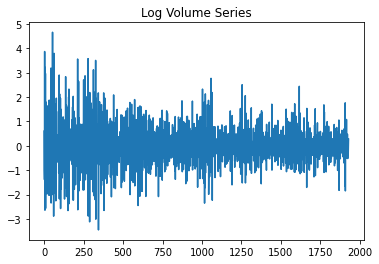

In [27]:
#Log volume graph shows no significant trend and seasonality
plt.plot(df['log_volume'].values)
plt.title('Log Volume Series')
plt.show()

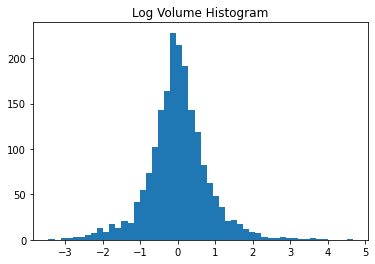

In [28]:
#Log volume distribution is normal-shape, seems stationary to model time series for trading volume
plt.hist(df['log_volume'],bins=50)
plt.title('Log Volume Histogram')
plt.show()

In [29]:
#Use Augmented Dickey-Fuller Test to check stationarity
def adf_test(data_set, maxlag=None):
    if type(data_set)==pd.core.frame.DataFrame:
        data_set = data_set.dropna().to_numpy().flatten()
    
    result = adfuller(data_set, maxlag=maxlag, autolag=None)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    print('Augmented Dickey-Fuller Test:') 
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary.") 
    else:
        print("Weak evidence against null hypothesis. Time series is non-stationary.")

In [30]:
adf_test(df['log_volume'],maxlag=4)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.54462012439214
p-value : 0.0
#Lags Used : 4
Number of Observations Used : 1924
Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary.


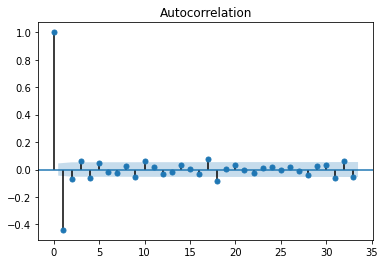

In [31]:
#1-step lag volume is correlated to the current log volume
plot_acf(df['log_volume'])
plt.show()

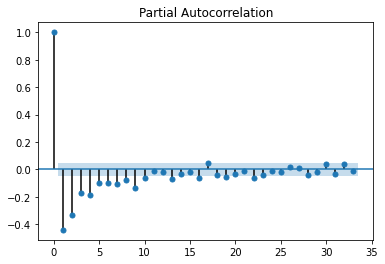

In [32]:
#1-step, 2-step, 3-step, and 4-step lag volumes are partially correlated to the current log volume
plot_pacf(df['log_volume'])
plt.show()

In [33]:
model = ARMA(df['log_volume'], order=(1,1)).fit()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:             log_volume   No. Observations:                 1929
Model:                     ARMA(1, 1)   Log Likelihood               -1934.088
Method:                       css-mle   S.D. of innovations              0.659
Date:                Sat, 19 Dec 2020   AIC                           3876.175
Time:                        16:12:27   BIC                           3898.434
Sample:                             0   HQIC                          3884.363
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0035      0.002      1.609      0.108      -0.001       0.008
ar.L1.log_volume     0.1254      0.028      4.412      0.000       0.070       0.181
ma.L1.log_volume    -0.8743 

#### Comments: The ARMA result table shows that coefficients for AR terms are not significant for model with AR lags greater than 1, so the most bacic model ARMA(1,1) has been chosen, which matches the empirical results in the industry.

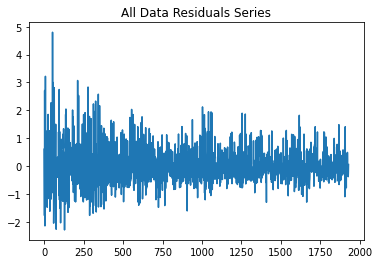

In [34]:
#Residuals show no clear patterns, meaning a linear model is appropriate for the data
plt.plot(model.resid.values)
plt.title('All Data Residuals Series')
plt.show()

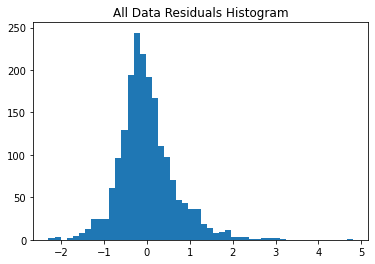

In [35]:
#Residuals are close to normal shape, indicating the appropriateness of linear model
plt.hist(model.resid.values,bins=50)
plt.title('All Data Residuals Histogram')
plt.show()

In [36]:
#perform rolling model fitting and one-step-ahead prediction for last 650 data
pred = np.zeros(len(df))
for i in reversed(range(1,651)):
    train = df[:-i]
    model = ARMA(train['log_volume'], order=(1,1)).fit()
    pred[-i] = model.forecast()[0]


In [37]:
df['pred_log_volume'] = pred
test = df[-650:]

In [38]:
#“resid” measures the difference between true log volume and predicted log volume
test['resid'] = test['log_volume']-test['pred_log_volume']
#"error pct" measures the "resid" in proportion of the true log volume
test['error pct'] = abs(test['resid'])/test['log_volume']
#"same sign" is assigned True if true and predicted log volumes have the same sign
test['same sign'] = (test.log_volume * test.pred_log_volume > 0)

In [39]:
test

,Volume,log_volume,pred_log_volume,resid,error pct,same sign
Date,,,,,,
2018-05-22,2383900,1.339061,0.219816,1.119245,0.835843,True
2018-05-23,728000,-1.186192,-0.822670,-0.363522,-0.306461,True
2018-05-24,553400,-0.274220,0.179358,-0.453578,-1.654066,False
2018-05-25,680300,0.206453,0.373636,-0.167183,0.809790,True
2018-05-29,743800,0.089238,0.178957,-0.089718,1.005379,True
...,...,...,...,...,...,...
2020-12-11,762700,0.056364,0.212059,-0.155695,2.762292,True
2020-12-14,875900,0.138387,0.146202,-0.007815,0.056471,True
2020-12-15,612500,-0.357703,0.027262,-0.384965,-1.076213,False


In [40]:
print('Log Volume RMSE:',np.sqrt(mean_squared_error(test.log_volume,test.pred_log_volume)))
print('Standard Deviation of Log Volume:',test.log_volume.std())
print('Log volume root mean squared error is very close to standard deviation, demonstrating the good predicting power')

Log Volume RMSE: 0.4519627510236069
Standard Deviation of Log Volume: 0.5430663089820303
Log volume root mean squared error is very close to standard deviation, demonstrating the good predicting power


In [41]:
print('Directional accuracy:',test['same sign'].sum()/len(test))
print('Up/down side prediction accuracy (65.5%) is better than random guesses (50%)')

Directional accuracy: 0.6553846153846153
Up/down side prediction accuracy (65.5%) is better than random guesses (50%)


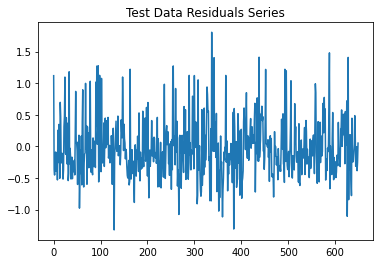

In [42]:
#Residuals show no clear patterns
plt.plot(test.resid.values)
plt.title('Test Data Residuals Series')
plt.show()

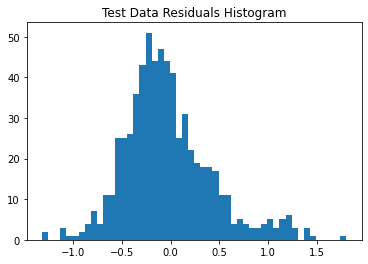

In [43]:
#Residuals are close to normal distribution
plt.hist(test.resid.values,bins=50)
plt.title('Test Data Residuals Histogram')
plt.show()

In [44]:
#transform log volume prediction to volume
test['pred_volume'] = test.Volume*np.exp(test.pred_log_volume)
test

,Volume,log_volume,pred_log_volume,resid,error pct,same sign,pred_volume
Date,,,,,,,
2018-05-22,2383900,1.339061,0.219816,1.119245,0.835843,True,2.969976e+06
2018-05-23,728000,-1.186192,-0.822670,-0.363522,-0.306461,True,3.197792e+05
2018-05-24,553400,-0.274220,0.179358,-0.453578,-1.654066,False,6.621148e+05
2018-05-25,680300,0.206453,0.373636,-0.167183,0.809790,True,9.884817e+05
2018-05-29,743800,0.089238,0.178957,-0.089718,1.005379,True,8.895617e+05
...,...,...,...,...,...,...,...
2020-12-11,762700,0.056364,0.212059,-0.155695,2.762292,True,9.428657e+05
2020-12-14,875900,0.138387,0.146202,-0.007815,0.056471,True,1.013793e+06
2020-12-15,612500,-0.357703,0.027262,-0.384965,-1.076213,False,6.294274e+05


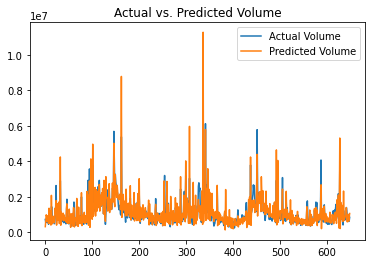

In [45]:
plt.plot(test.Volume.values[1:],label='Actual Volume')
plt.plot(test.pred_volume.values[1:],label='Predicted Volume')
plt.legend()
plt.title('Actual vs. Predicted Volume')
plt.show()

#### Conclusion: The predicted price path nicely follows the actual price path from the analysis above. ARMA model is good at predicting volumes.

### Predict the trade volume of MTUM with Log-Linear Regression

In [46]:
df = pd.read_csv('MTUM.csv',index_col='Date')
df = df.iloc[:,4:6]
df['log_volume'] = np.log(df['Volume']/df['Volume'].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
df.dropna(inplace=True)
df

,Adj Close,Volume,log_volume
Date,,,
2013-04-24,46.782730,1100,0.606136
2013-04-25,47.009575,400,-1.011601
2013-04-26,46.973267,100,-1.386294
2013-04-29,47.245476,4800,3.871201
2013-04-30,47.036781,1400,-1.232144
...,...,...,...
2020-12-11,156.220001,762700,0.056364
2020-12-14,157.210007,875900,0.138387
2020-12-15,158.699997,612500,-0.357703


In [47]:
pred_volume = np.zeros(len(df))
pred_log_volume = np.zeros(len(df))

for i in range(650,len(df)-1):
    volume_train = df['log_volume'][i-649:i+1]
    price_train = df['Adj Close'][i-650:i]
    reg = LinearRegression().fit(price_train.values.reshape(-1,1), volume_train.values.reshape(-1,1))
    #Use yesterday's adjusted close price to predict today's volume for avoiding lookahead bias
    pred_log_volume[i+1] = reg.predict(df['Adj Close'][i].reshape(-1,1))
    

In [48]:
df['pred_volume'] = np.exp(pred_log_volume)*df['Volume'].shift(1)
df['pred_log_volume'] = pred_log_volume
df[-650:]

,Adj Close,Volume,log_volume,pred_volume,pred_log_volume
Date,,,,,
2018-05-22,107.160873,2383900,1.339061,6.288741e+05,0.006499
2018-05-23,107.614372,728000,-1.186192,2.423567e+06,0.016503
2018-05-24,107.556488,553400,-0.274220,7.355267e+05,0.010286
2018-05-25,107.247711,680300,0.206453,5.575269e+05,0.007430
2018-05-29,105.887215,743800,0.089238,6.860116e+05,0.008361
...,...,...,...,...,...
2020-12-11,156.220001,762700,0.056364,7.295065e+05,0.011868
2020-12-14,157.210007,875900,0.138387,7.746904e+05,0.015599
2020-12-15,158.699997,612500,-0.357703,8.888385e+05,0.014664


In [49]:
print('Log Volume RMSE:',np.sqrt(mean_squared_error(df['log_volume'][-650:],df['pred_log_volume'][-650:])))
print('Standard Deviation of Log Volume:',df['log_volume'][-650:].std())
print('Log volume root mean squared error is very close to standard deviation, demonstrating the good predicting power')

Log Volume RMSE: 0.5443829669987478
Standard Deviation of Log Volume: 0.5430663089820303
Log volume root mean squared error is very close to standard deviation, demonstrating the good predicting power


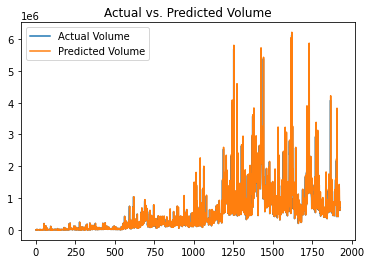

In [50]:
plt.plot(df['Volume'].values[1:],label='Actual Volume')
plt.plot(df['pred_volume'].values[1:],label='Predicted Volume')
plt.legend()
plt.title('Actual vs. Predicted Volume')
plt.show()

#### Conclusion: Even the log-linear regression predicted volume path follows the actual volume path generally well from the analysis above, the similarity between RMSE and standard deviation makes it a less favorable approach than ARMA model.

**Predicting the Trade Volume of MTUM:** To come up with a model which estimates the trade volume of people who track momentum factor, we decide to select MTUM as our predicting object since MTUM is a representative momentum factor ETF. Based on our research, we find out that time series models and regression models are the mainstream predicting tools for volume traders in industry. Then we begin our process by ARMA model for predictions firstly. Since directly modeling volume is not stationary (failed to pass Augmented Dickey-Fuller Test), we choose log volume instead. Even though the ACF and PACF plots suggests an order of (4,1) fits best for log volume prediction, AR terms with lag greater than 1 are not statistically siginificant. Hence, the most basic model ARMA(1,1) fits the log volume prediction best, which matches the emipiral results from industry. After converting predicted log volumes to volumes, we notice that the predicted volumes follow the real volumes closely. On the other hand, we attempt to regress volumes by adjusted close price of MTUM initially. However, since volumes are not linearly related to adjusted close price, the prediction results are poor. We rather use log volume as the dependent variable. With the same testing set and rolling process as the ARMA model approach, we observe that log-linear regression underperforms by comparing the plots (most of the predicted volumes in regression are overvalued). To measure them more accurately, we discover that the root mean squared error from regression (0.544) is slightly higher than the standard deviation (0.543), while the RMSE from ARMA model (0.452) is lower than standard deviation. Thus, we conclude both methods predict the trade volume of MTUM well, but the prediction power of ARMA model is stronger.